# Decision Trees

## Training and Visualizing Decision Trees

To understand Decision Trees, let’s build one and take a look at how it makes predictions.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # petal length and petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

We can visualize the trained Decision Tree by first using the `export_graphviz()` method to ouput a graph definition file called *iris_tree.dot*:

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,out_file="./decision_tree_images/iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

Then we can use the dot command-line tool from the Graphviz package to convert this *.dot*
file to a variety of formats, such as PDF or PNG. This command line converts the *.dot* file
to a *.png* image file:

```bash
$ dot -Tpng iris_tree.dot -o iris_tree.png
```

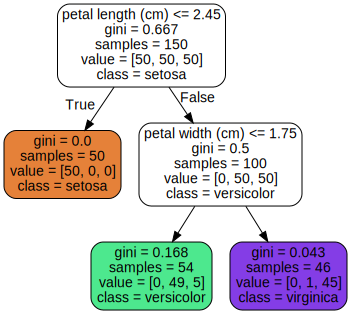

In [4]:
import os
from graphviz import Source

Source.from_file(os.path.join("decision_tree_images", "iris_tree.dot"))

# Our first decision tree looks like this

## Making Predictions

Let's see how the tree represented in above figure makes predictions. Suppose we find an iris flower and want to classify it. We start at the root node (depth 0, at the top): this node asks whether flower's petal length is less than 2.45 cm. If yes, we move down to the root's left child node (depth 1, left). In this case it is *leaf node* (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the Decision Tree predicts that flower is an *Iris Setosa* (`class=setosa`)

Now suppose we find another flower, and this time flower's petal length is greater than 2.45 cm. We must move down to root's right child node (depth 1, right), which is not leaf node, so the node asks the question: is the petal width smaller than 1.75 cm? If it is, then flower is most likely *Iris Versicolor* (depth 2, left). If not, it is likely it is likely an *Iris Virginica* (depth 2, right).

**NOTE:**

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

A node's `samples` attribute counts how many training instances it applies to. For example, 100 training instances have petal length greater than 2.45 cm (depth 1, right) , and those of 100, 54 have petal width smaller than 1.75 cm (depth 2, left).

A nodes's `value` attribute tells us how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 *Iris Setosa*, 1 *Iris Versicolor* and 45 *Iris Virginica*.

Node's `gini` attribute measures its *impurity*: a node is "pure" (`gini = 0`) if all training instances it applies belong to the same class. For example: since the depth-1 left node node applies only to *Iris Setosa* training instances, it is pure and is `gini score` is 0.

**NOTE:**

Scikit-Learn uses the CART algorithm, which produces only *binary trees*: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

Code to generate decision boundaries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

    

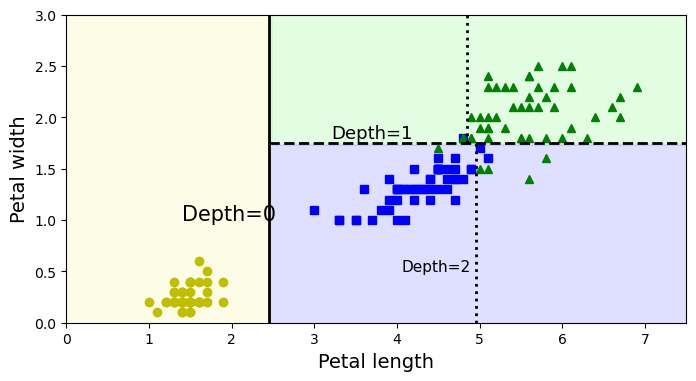

In [11]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0,3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0,1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)

plt.show()

Graph shows this Decision Tree's boundaries. Thick line represents the decision boundary for root node (depth-0): petal length=2.45cm. Since left hand are is pure (only *Iris Setosa*) it cannot be split any further. However, the right hand area is impure, so depth-1 right node splits it at petal width = 1.75cm (represented by dashed line). Since `max_depth` was set to 2, the Decision Tree stops right there. If we set `max_depth` to 3 (see below code), then the two depth-2 nodes would each add another decision boundaries (represnted by dotted lines).

Trying `max_depth`= 3

In [16]:
tree_clf_depth_3 = DecisionTreeClassifier(max_depth=3)
tree_clf_depth_3.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [17]:
export_graphviz(tree_clf_depth_3,out_file="./decision_tree_images/iris_tree_depth_3.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

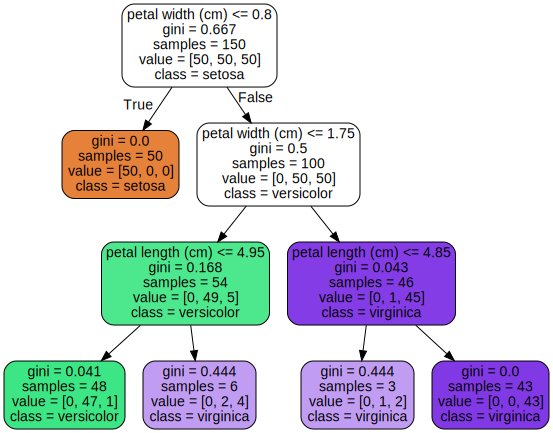

In [18]:
Source.from_file(os.path.join("./decision_tree_images", "iris_tree_depth_3.dot"))

## Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular
class *k*. First it traverses the tree to find the leaf node for this instance, and then it returns the
ratio of training instances of class *k* in this node. 

For example, suppose we have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for *Iris setosa* (0/54), 90.7% for *Iris versicolor* (49/54), and 9.3% for *Iris virginica* (5/54). And if
you ask it to predict the class, it should output Iris versicolor (class 1) because it has the
highest probability. Let’s check this:

In [21]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [24]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm

## Computational Complexity

## Gini Impurity or Entropy?

## Regularization Hyperparameters

Below graph shows two Decision Trees trained on the moons dataset.
On the left the Decision Tree is trained with the default hyperparameters (i.e., no
restrictions), and on the right it’s trained with `min_samples_leaf=4`. It is quite obvious that
the model on the left is overfitting, and the model on the right will probably generalize
better.

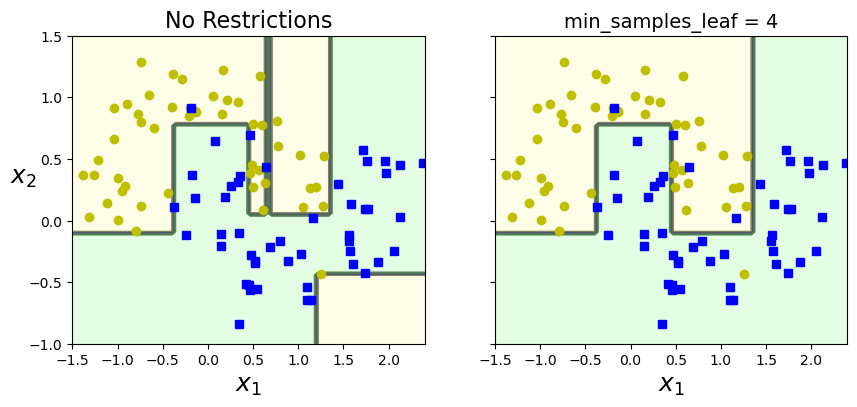

In [26]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No Restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

Visualizing decision trees for both graph

In [30]:
export_graphviz(deep_tree_clf1,out_file="./decision_tree_images/deep_tree_clf1.dot", feature_names=['featue_1', 'feature_2'], class_names=['class_0', 'class_1'], rounded=True, filled=True)

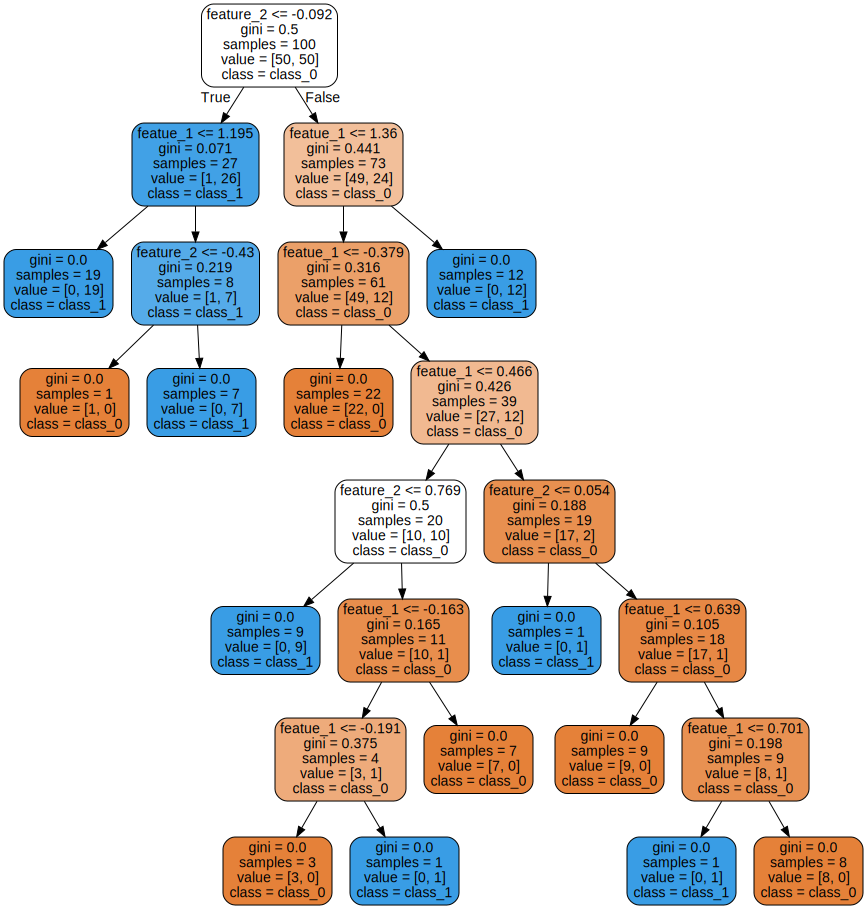

In [31]:
Source.from_file(os.path.join("./decision_tree_images/", "deep_tree_clf1.dot"))

In [32]:
export_graphviz(deep_tree_clf2,out_file="./decision_tree_images/deep_tree_clf2.dot", feature_names=['featue_1', 'feature_2'], class_names=['class_0', 'class_1'], rounded=True, filled=True)

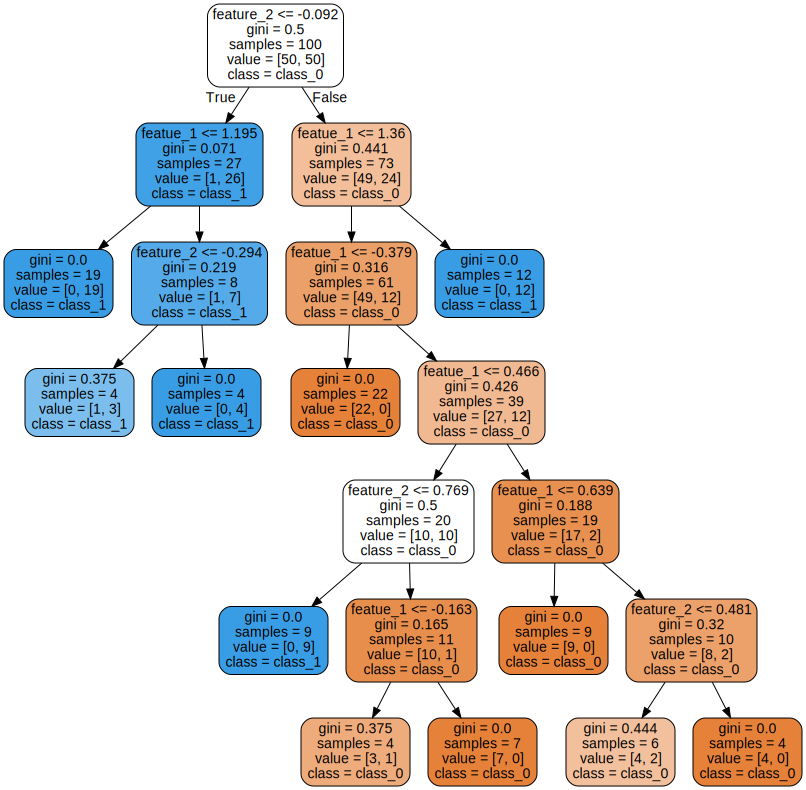

In [33]:
Source.from_file(os.path.join("./decision_tree_images/", "deep_tree_clf2.dot"))

## Regression

Decision Trees are also capable of performing regression tasks. Let’s build a regression tree
using Scikit-Learn’s `DecisionTreeRegressor` class, training it on a noisy quadratic dataset
with max_depth=2:

In [34]:
# Quadratic Training Set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.rand(m, 1) / 10

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Resulting Tree is shown below:

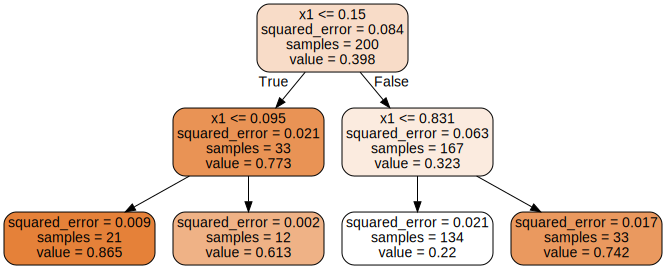

In [38]:
export_graphviz(tree_reg, "./decision_tree_images/tree_reg.dot", feature_names=["x1"], rounded=True, filled=True)
Source.from_file(os.path.join("./decision_tree_images/", "tree_reg.dot"))

This tree looks very similar to the classification tree we built earlier. The main difference is
that instead of predicting a class in each node, it predicts a value. For example, suppose we
want to make a prediction for a new instance with $x_1$ = 0.6. We traverse the tree starting at
the root, and we eventually reach the leaf node that predicts value=0.22. This prediction
is the average target value of the 134 training instances associated with this leaf node, and it
results in a mean squared error equal to 0.021 over these 134 instances.

Predictions of two Decision Tree Regressor Models:

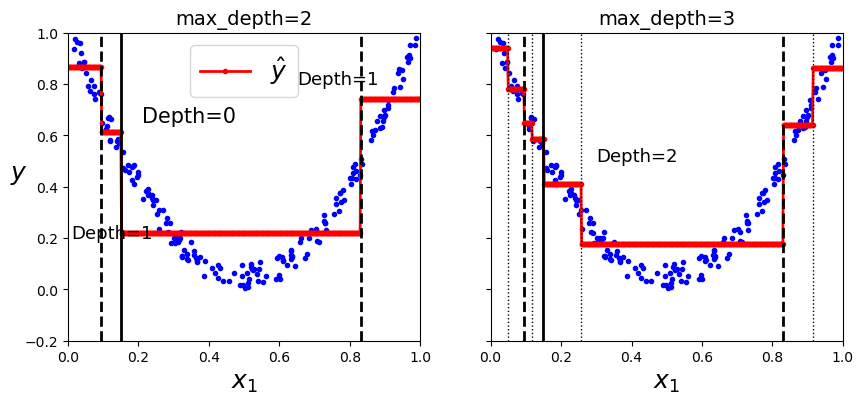

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y , axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.15, "k-"), (0.095, "k--"), (0.831, "k--")):
    plt.plot([split,split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.15, "k-"), (0.095, "k--"), (0.831, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.049, 0.118, 0.258, 0.916):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

Model’s predictions with `max_depth=2` are represented on the left in above graph. If we set `max_depth=3`,
we get the predictions represented on the right. Notice how the predicted value for each
region is always the average target value of the instances in that region. The algorithm splits
each region in a way that makes most training instances as close as possible to that predicted
value.

The CART algorithm works mostly the same way as earlier, except that instead of trying to
split the training set in a way that minimizes impurity, it now tries to split the training set in
a way that minimizes the MSE.

## Instability

Below graph shows a simple linearly separable dataset: on the left, a Decision Tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both Decision Trees fit
the training set perfectly, it is very likely that the model on the right will not generalize well.
One way to limit this problem is to use Principal Component Analysis (see Chapter 8),
which often results in a better orientation of the training data.

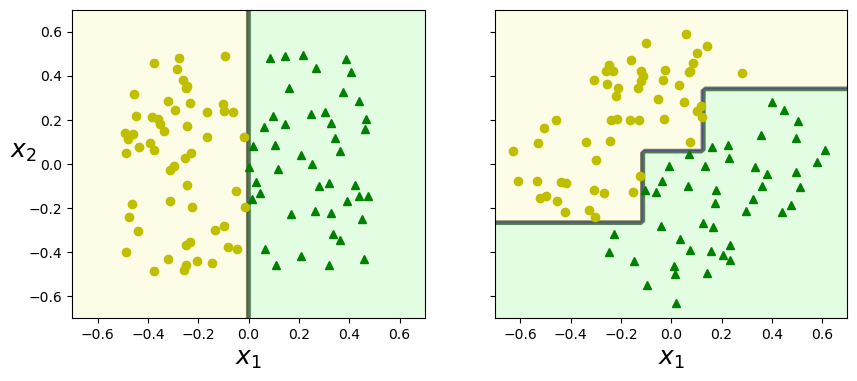

In [65]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()